Zadaniem jest określenie typów wina na podstawie poniższego zbioru danych:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
- Przeprowadź krótką wstępną analizę danych
- Stwórz funkcję budującą model (DNN)
- Przeprowadź trening i walidację wyników
- Na podstawie historii treningu przedstaw zmianę funkcji loss
- Sprawdź jak zmiana hiperparametrów i architektury Twojej sieci wpływa na wyniki i przedstaw swoje obserwacje

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [6]:
# tworzymy ramkę dnaych w celu dalszej wizulaziacji i analizy 
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.shape

(178, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [9]:
df.isna().sum().sum()

0

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
# sprawdzenie udziału kategorii targetu
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

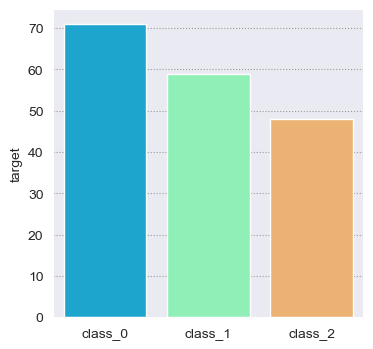

In [12]:
# zbiór jest stosunkowo zbalansowany
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig = plt.figure(figsize=(4,4))
sns.barplot(x=data.target_names, y=df.target.value_counts(), palette='rainbow')
#plt.bar(data.target_names, classCnts)
plt.show()

In [13]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

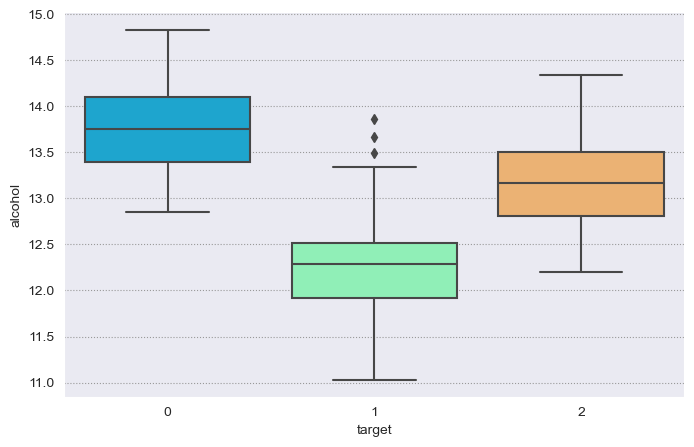

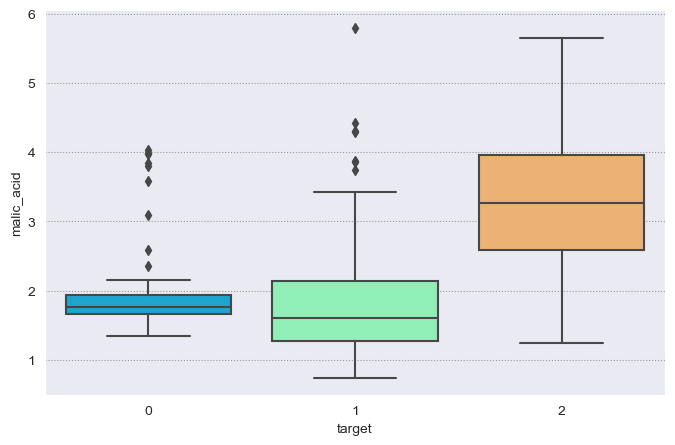

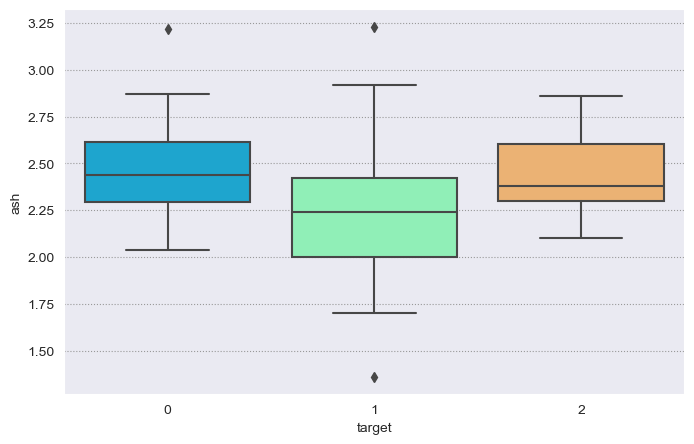

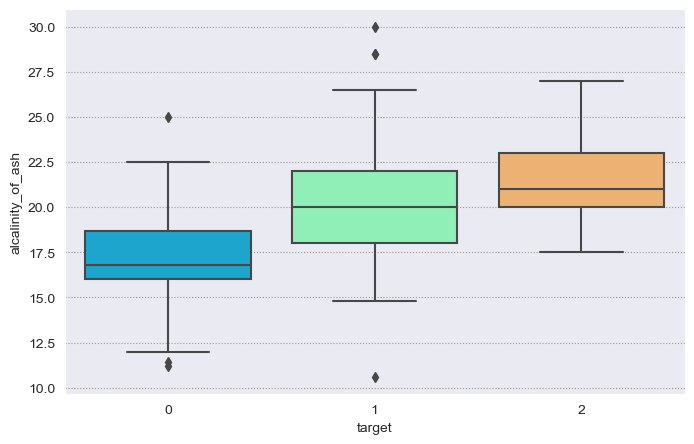

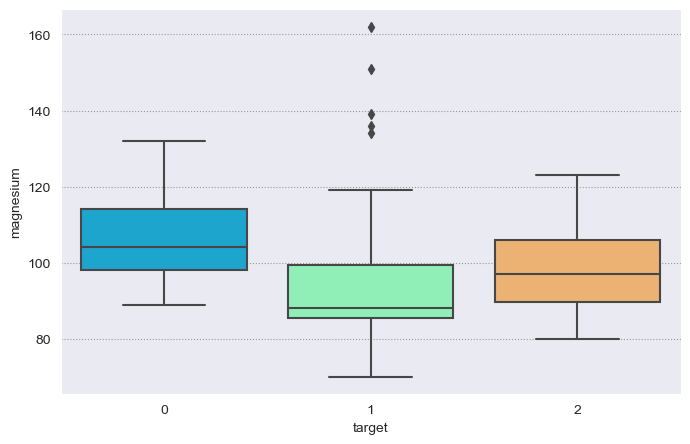

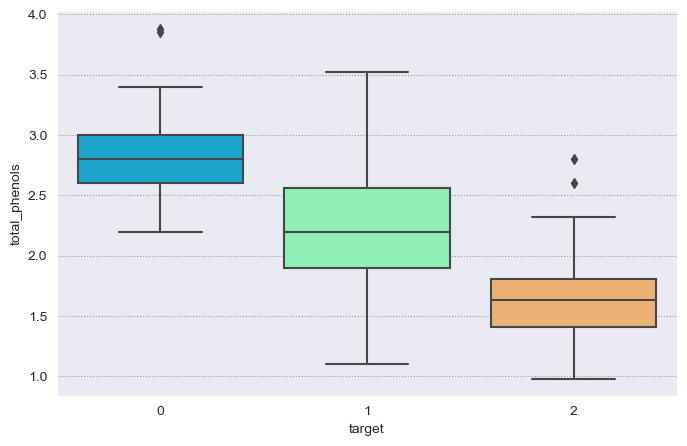

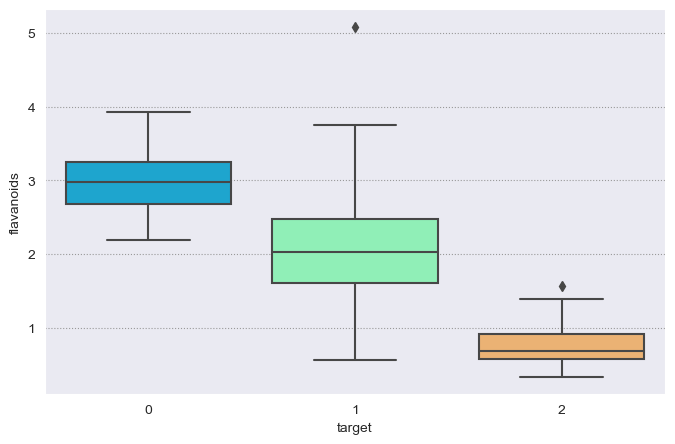

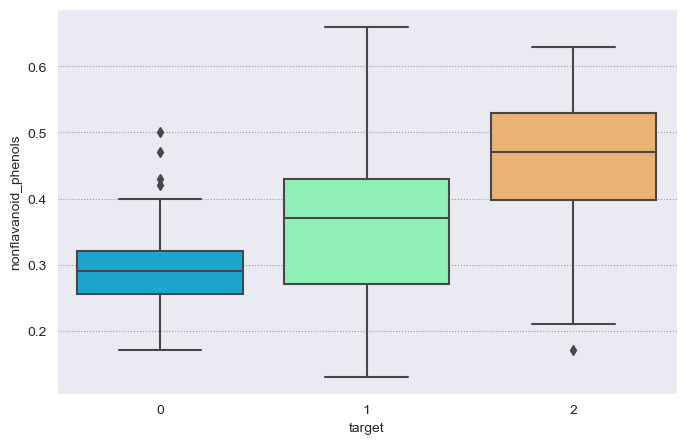

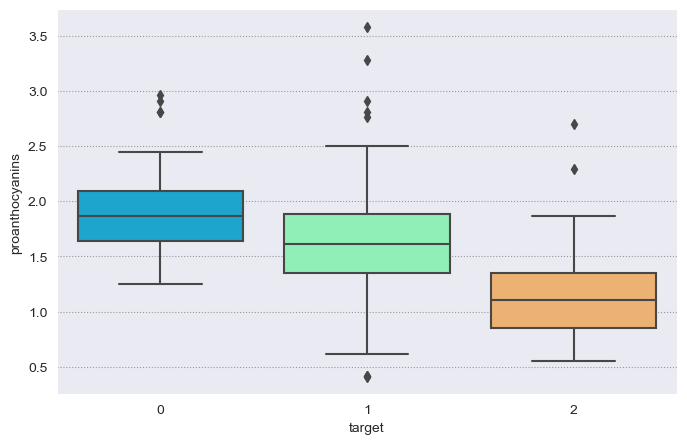

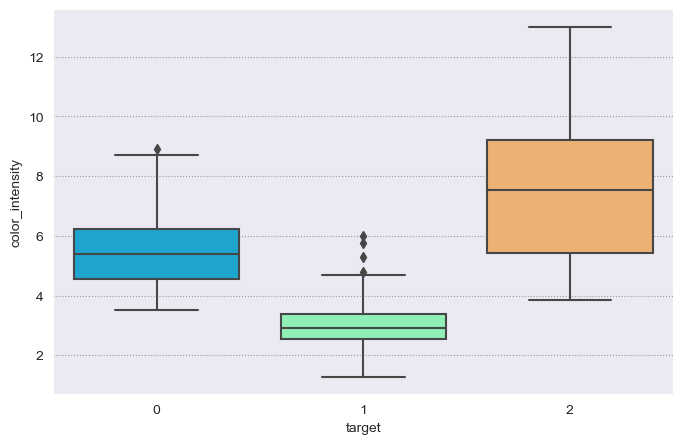

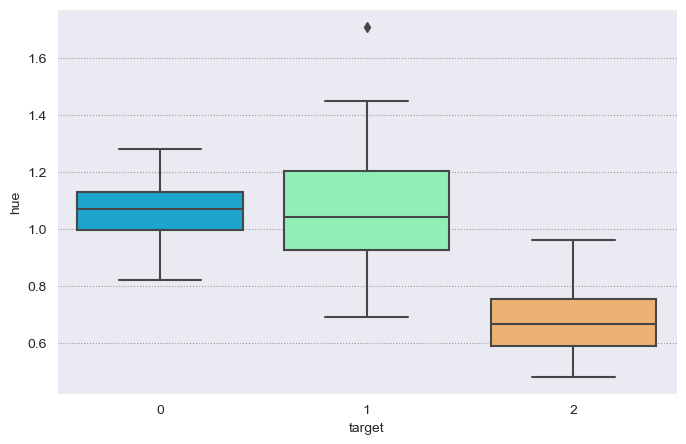

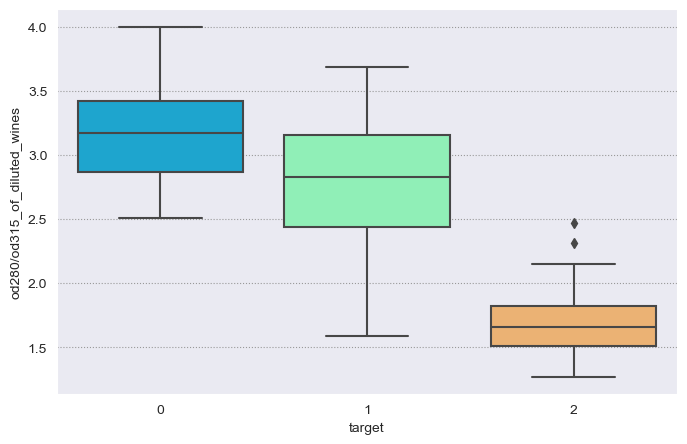

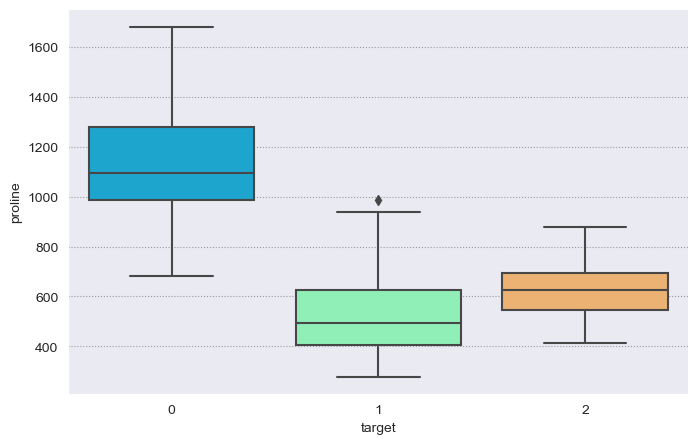

In [14]:
# zmienne wejściowe w odniesieniu do zmiennej targetu
for col in df.columns[:-1]:
    fig = plt.figure(figsize=(8,5))
    sns.boxplot(data=df,x=df.columns[-1],y=col,palette='rainbow')
    plt.show()

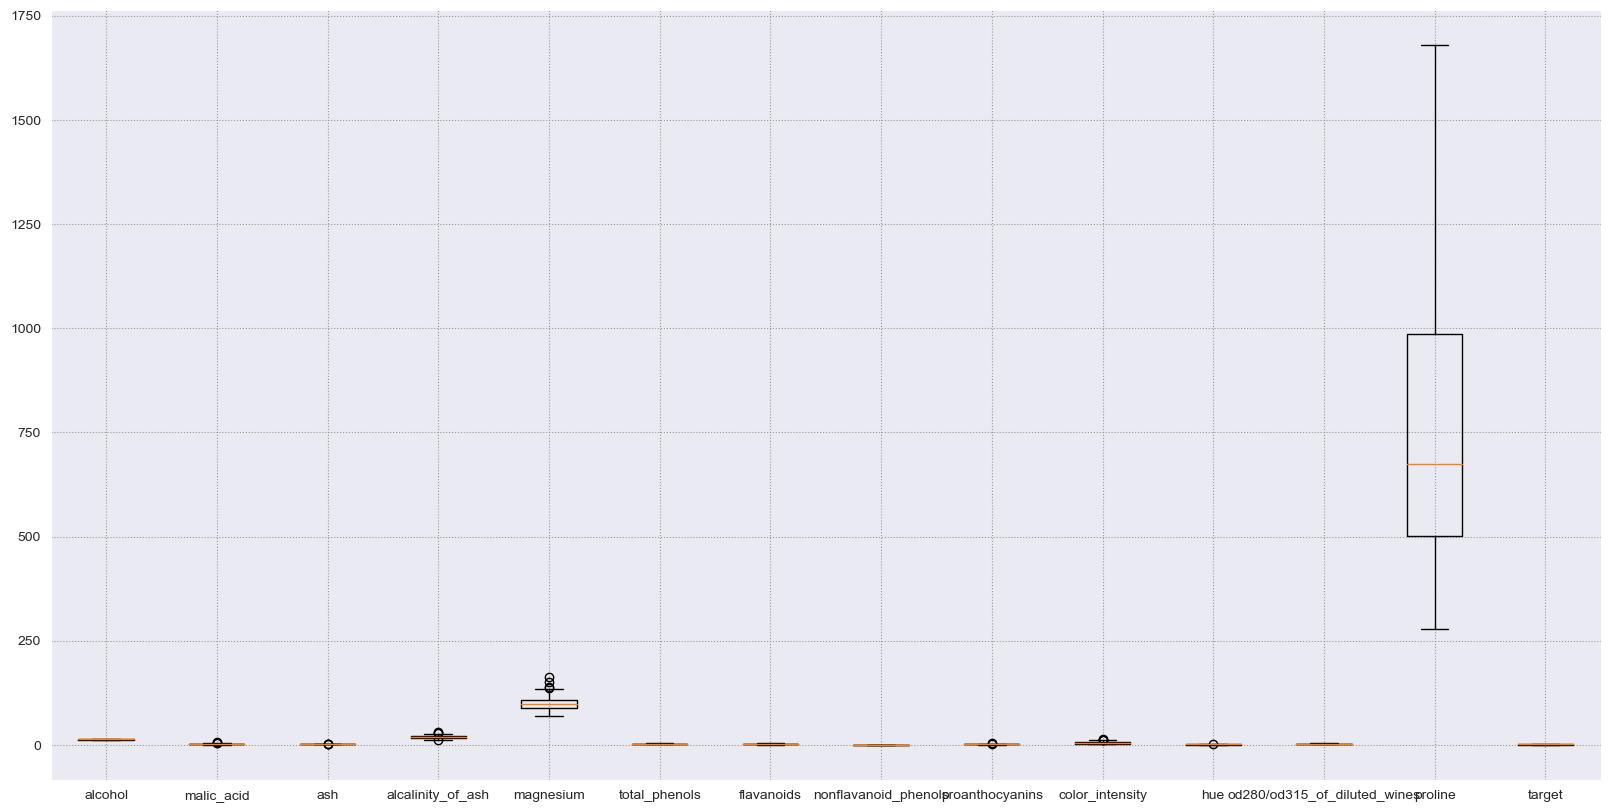

In [15]:
fig = plt.figure(figsize=(20,10))
plt.boxplot(df, labels=df.columns)
plt.show()

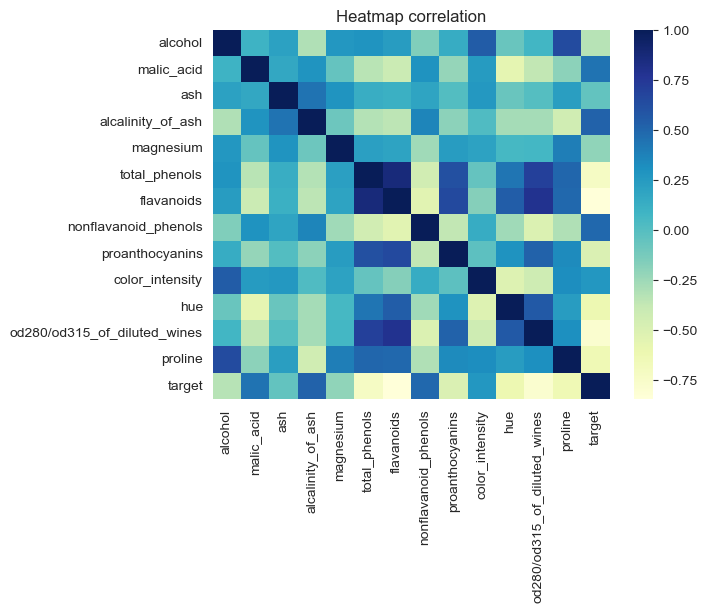

In [16]:
df_corr=df.corr()
sns.heatmap(df_corr, cmap="YlGnBu") 
sns.set(font_scale=1)
plt.title('Heatmap correlation')
plt.show()

In [17]:
rank = df_corr.target
df_rank = pd.DataFrame(rank) 
df_rank = df_rank.sort_values(by='target', ascending=False) 
df_rank

,target
target,1.000000
alcalinity_of_ash,0.517859
nonflavanoid_phenols,0.489109
malic_acid,0.437776
color_intensity,0.265668
ash,-0.049643
magnesium,-0.209179
alcohol,-0.328222
proanthocyanins,-0.499130
hue,-0.617369


#### Feature Engineering i przygotowanie zbiorów 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
# zmienne dla targetu i predyktorów
x = data.data.astype(np.float32)
y = data.target.astype(np.float32)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
y = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1, 1))

In [22]:
# tworzymy podział danych na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [23]:
#standaryxacja dla zbioru treningowego i testowego (choć powinno być tylko dla testowego)
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

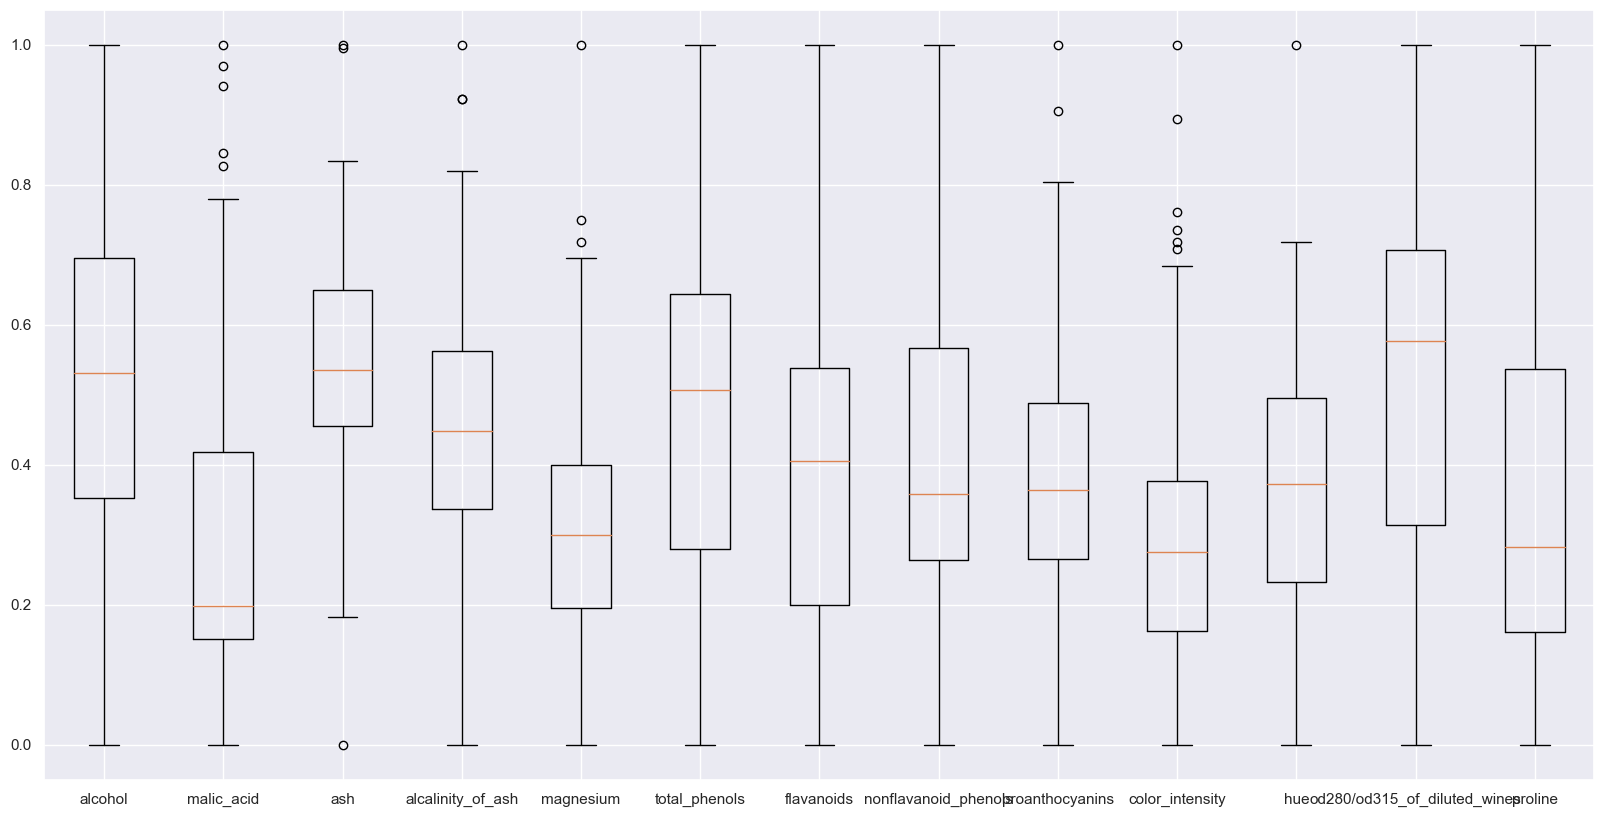

In [24]:
# wizualizacja danych po standaryzacji
fig = plt.figure(figsize=(20,10))
plt.boxplot(x_train, labels=data.feature_names)
plt.show()

In [25]:
x_train.shape

(142, 13)

In [26]:
x_test.shape

(36, 13)

#### Funkcja tworząca model

In [27]:
class ModelDNN(object):
    def __init__(self, inSize, outSize, outAct, hiddenNum, hiddenAct, opt, job_type):
        self.lr = tf.Variable(0.0, dtype="float")
        
        self.W_h = []
        self.b_h = []
        
        #pierwsza ukryta
        self.W_h.append(tf.Variable(tf.random.normal([inSize, hiddenNum[0]])))
        self.b_h.append(tf.Variable(tf.zeros([hiddenNum[0]])))
        
        # kolejne ukryte
        for i in range(1, len(hiddenNum)):
            self.W_h.append(tf.Variable(tf.random.normal([hiddenNum[i-1], hiddenNum[i]])))
            self.b_h.append(tf.Variable(tf.zeros([hiddenNum[i]])))
        
        # warstwa wyjściowa
        self.W_out = tf.Variable(tf.random.normal([hiddenNum[-1], outSize]))
        self.b_out = tf.Variable(tf.zeros([outSize]))
        
        self.inSize = inSize
        self.outSize = outSize
        self.outAct = outAct
        self.hiddenAct = hiddenAct
        
        self.optimizer = opt
        
        self.job_type = job_type
        
    def predict(self, x):
        layer_in = x
        
        # pierwsza warstwa ukryta
        layer_hidden = tf.add(tf.matmul(layer_in, self.W_h[0]), self.b_h[0])
        layer_hidden = self.hiddenAct[0](layer_hidden)
        
        # kolejne warstwy ukryte
        for i in range(1, len(self.W_h)):
            layer_hidden = tf.add(tf.matmul(layer_hidden, self.W_h[i]), self.b_h[i])
            layer_hidden = self.hiddenAct[i](layer_hidden)

        # warstwa wyjściowa
        layer_out = tf.add(tf.matmul(layer_hidden, self.W_out), self.b_out)
        if self.outAct != None:
            layer_out = self.outAct(layer_out)
        
        return layer_out
    
    def lossFun(self, y_pred, y_true):
        y_true = tf.reshape(y_true, (-1, self.outSize))
        if self.job_type == "class":
            return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_true, y_pred))
        elif self.job_type == "regr":
            return tf.reduce_mean(tf.square(y_pred - y_true))
    
    def fit(self, x, y_true, lr=None):
        if lr != None:
            self.optimizer.learning_rate.assign(lr)
            
        with tf.GradientTape() as t:
            y_pred = self.predict(x)
            current_loss = self.lossFun(y_pred, y_true)
            
        gradient = t.gradient(
            current_loss,
            [*self.W_h, *self.b_h, self.W_out, self.b_out]
        )
        
        self.optimizer.apply_gradients(zip(
            gradient,
            [*self.W_h, *self.b_h, self.W_out, self.b_out]
        ))
        
        return current_loss

#### Trening i walidacja

In [28]:
from sklearn.metrics import classification_report

In [29]:
inSize = x.shape[1]
outSize = len(data.target_names)
outAct = None
hiddenNum = [20, 25, 30]
hiddenAct = [tf.nn.relu for i in range(len(hiddenNum))] 
opt = tf.optimizers.Adam()
job_type = "class"
lr =  0.001              
epochs_num = 500      
loss_list = [] 

model_dnn = ModelDNN(inSize, outSize, outAct, hiddenNum, hiddenAct, opt, job_type)

for i in range(epochs_num):
    tmp_loss = model_dnn.fit(
                        x_train,
                        y_train,
                        lr=lr
                        )
    loss_list.append(tmp_loss)

In [30]:
# sprawdzamy wyniki na zbiorze treningowym

from sklearn.metrics import classification_report
print("\nRaport klasyfikacji na zbiorze treningowym\n")
y_pred = tf.nn.softmax(
            model_dnn.predict(
                x_train
            )
          ).numpy().argmax(axis=1)
print(classification_report(y_train.argmax(axis=1), y_pred))


Raport klasyfikacji na zbiorze treningowym

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        32

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



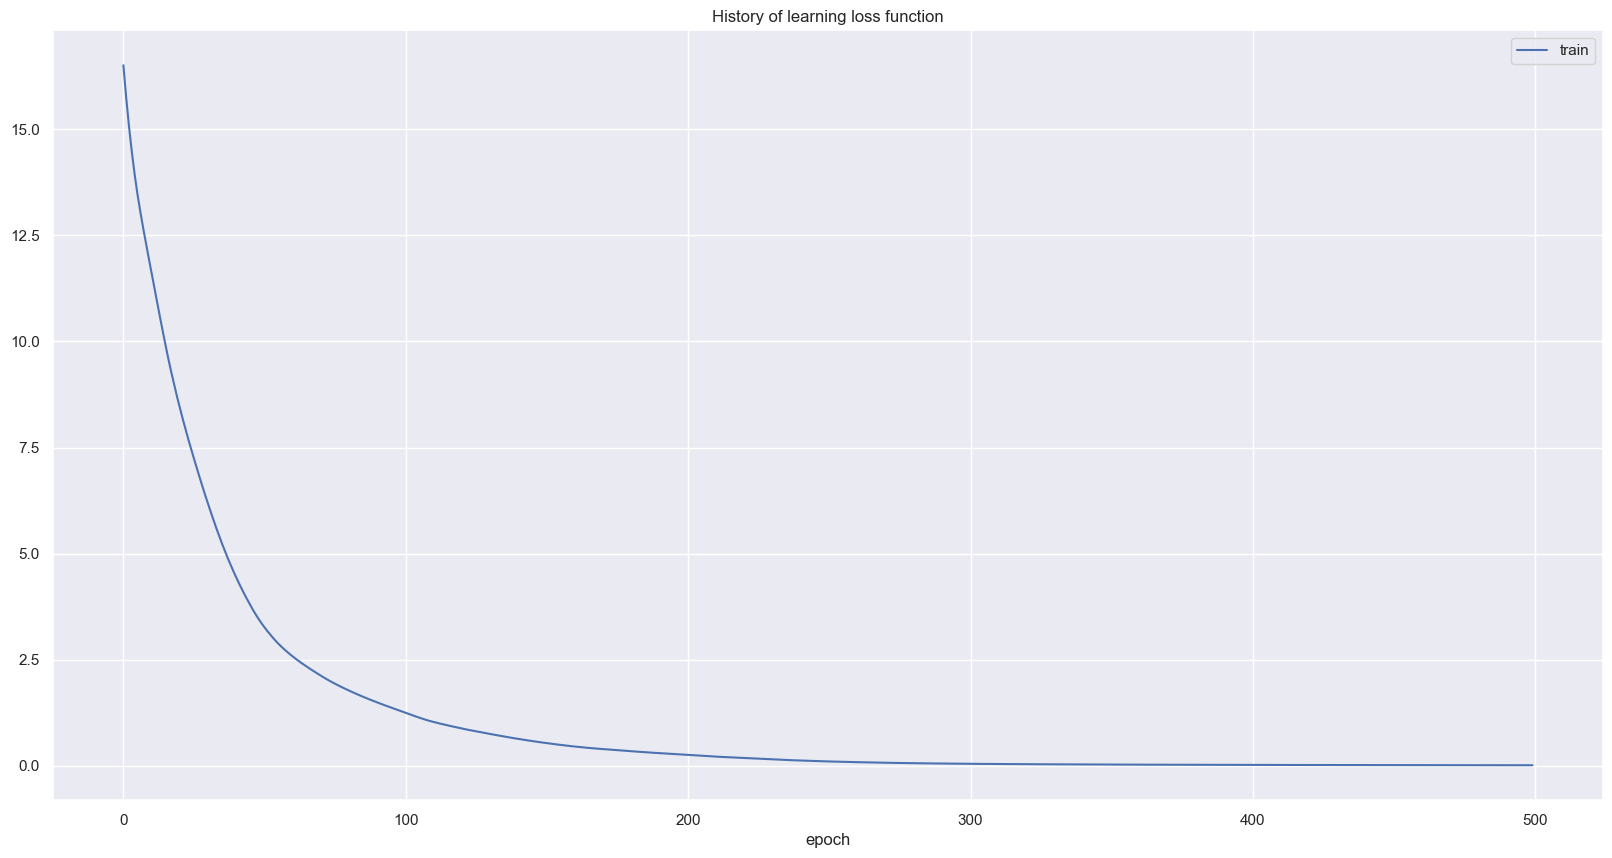

In [31]:
fig = plt.figure(figsize=(20,10))
plt.plot(loss_list)
plt.title('History of learning loss function')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [32]:
# testujemy model na całości i sprawdzamy wyniki
print("\nRaport klasyfikacji na zbiorze testowym\n")
y_pred = tf.nn.softmax(
            model_dnn.predict(
                x_test
            )
          ).numpy().argmax(axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred))


Raport klasyfikacji na zbiorze testowym

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.91      0.83      0.87        12
           2       0.94      0.94      0.94        16

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [33]:
# podgląd wyników modelu na malutkim zbiorze z testu
y_pred = tf.nn.softmax(
            model_dnn.predict(
                x_test[:30]
            )
          ).numpy().argmax(axis=1)
          
print(f"Wyjścia z sieci:\n{y_pred}")
print(f"Co powinno być:\n{y_test[:30].argmax(axis=1)}")

Wyjścia z sieci:
[2 2 0 1 1 0 2 0 0 1 1 0 0 2 1 1 1 2 2 2 1 2 0 2 2 2 0 1 2 2]
Co powinno być:
[2 2 0 1 1 1 2 0 0 1 1 0 0 2 1 1 1 1 2 2 1 2 0 2 2 2 0 1 2 2]


#### Opcja modelu z batchowaniem zbioru

In [41]:
inSize = x.shape[1]
outSize = len(data.target_names)
outAct = None
hiddenNum = [20, 25, 30]
hiddenAct = [tf.nn.relu for i in range(len(hiddenNum))] 
opt = tf.optimizers.Adam()
job_type = "class"

lr =  0.001        

epochNum = 100
batchSize = 20
batchNum = int(x_train.shape[0]/batchSize)
lastBatch = x_train.shape[0]%batchSize   

loss_list = [] 


model_dnn = ModelDNN(inSize, outSize, outAct, hiddenNum, hiddenAct, opt, job_type)


if lastBatch>0:
    batchNum += 1

for e in range(epochNum):
    
    # podział na batche
    for i in range(batchNum):
        batchStart = i * batchSize
        batchEnd = batchStart + batchSize

        if lastBatch>0 and i == batchNum - 1:
            batchEnd = batchStart+lastBatch

        loss_list.append(model_dnn.fit(x_train[batchStart:batchEnd],
                                           y_train[batchStart:batchEnd],
                                           lr 
                                           ).numpy())
        
# sprawdzamy wyniki na zbiorze treningowym
print("\nRaport klasyfikacji na zbiorze treningowym\n")
y_pred = tf.nn.softmax(
            model_dnn.predict(
                x_train
            )
          ).numpy().argmax(axis=1)
print(classification_report(y_train.argmax(axis=1), y_pred))


# testujemy na całości
print("\nRaport klasyfikacji na zbiorze testowym\n")
y_pred = tf.nn.softmax(
            model_dnn.predict(
                x_test
            )
          ).numpy().argmax(axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred))


Raport klasyfikacji na zbiorze treningowym

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        32

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


Raport klasyfikacji na zbiorze testowym

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.92      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.96      0.94      0.95        36



#### Opcja modelu z wykorzystaniem metod Kerasa

In [42]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [43]:
def create_model(hNum1,hNum2,hNum3,fun_act):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(x_train.shape[1])))
    model.add(layers.Dense(hNum1, activation=fun_act, name="ukryta1"))
    model.add(layers.Dense(hNum2, activation=fun_act, name="ukryta2"))
    model.add(layers.Dense(hNum3, activation=fun_act, name="ukryta3"))
    model.add(layers.Dense(len(data.target_names), name="wyjscie"))
    model.add(layers.Softmax())
    print(model.summary())
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [44]:
model_1 = create_model(10,15,20, 'relu')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ukryta1 (Dense)             (None, 10)                140       
                                                                 
 ukryta2 (Dense)             (None, 15)                165       
                                                                 
 ukryta3 (Dense)             (None, 20)                320       
                                                                 
 wyjscie (Dense)             (None, 3)                 63        
                                                                 
 softmax_1 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 688
Trainable params: 688
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
results = model_1.fit(x_train, y_train, validation_split=0.33, batch_size=20, epochs=500, verbose=0)

In [46]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

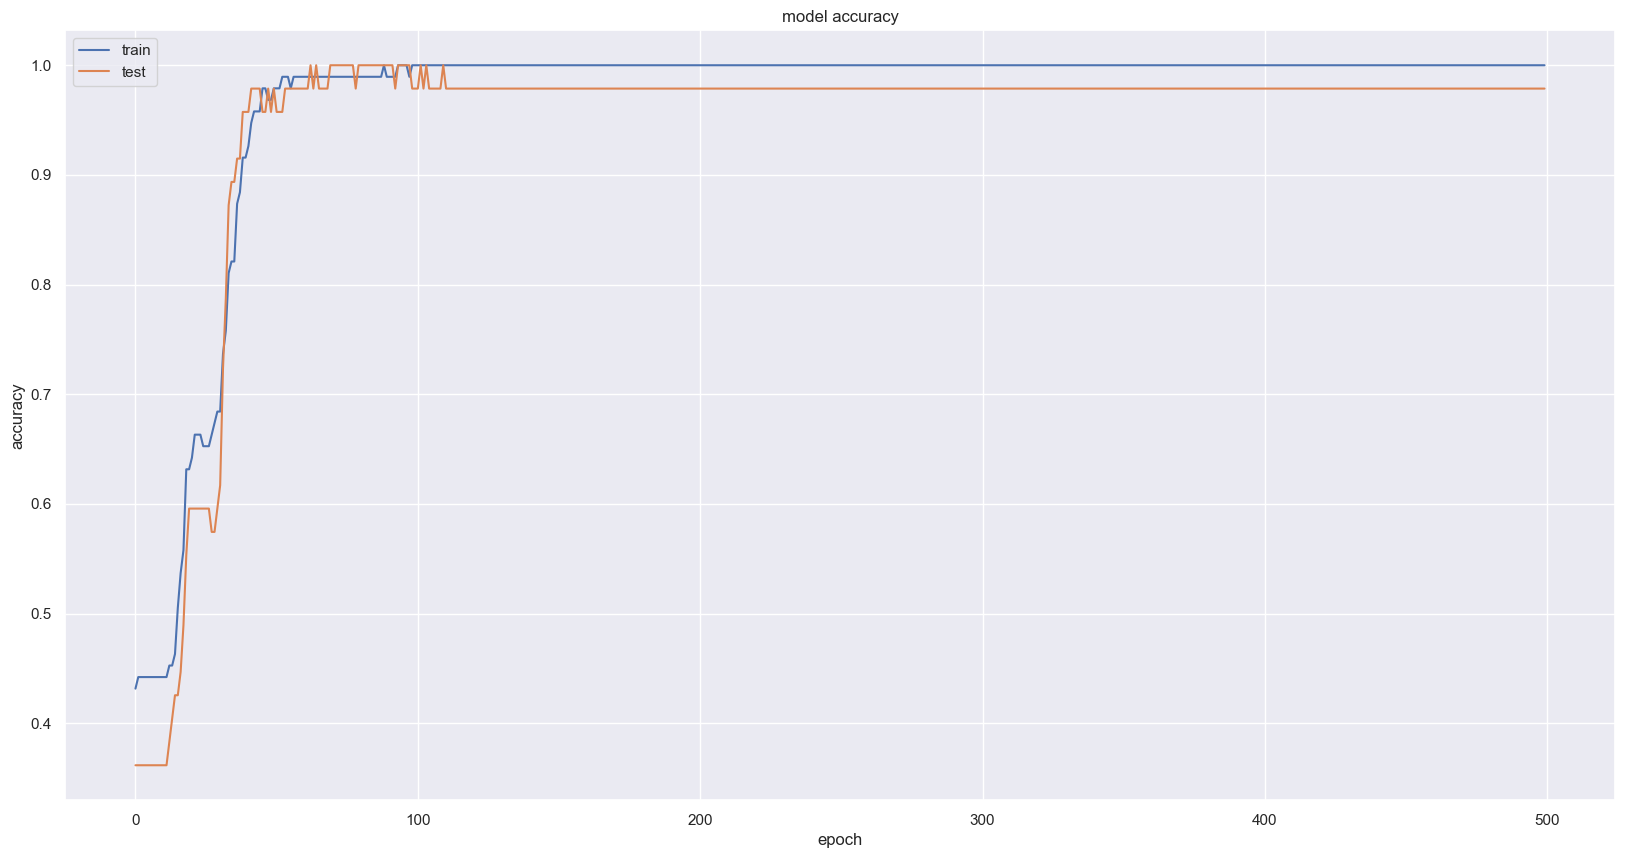

In [47]:
# histaoria meryki accuracy
fig = plt.figure(figsize=(20,10))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

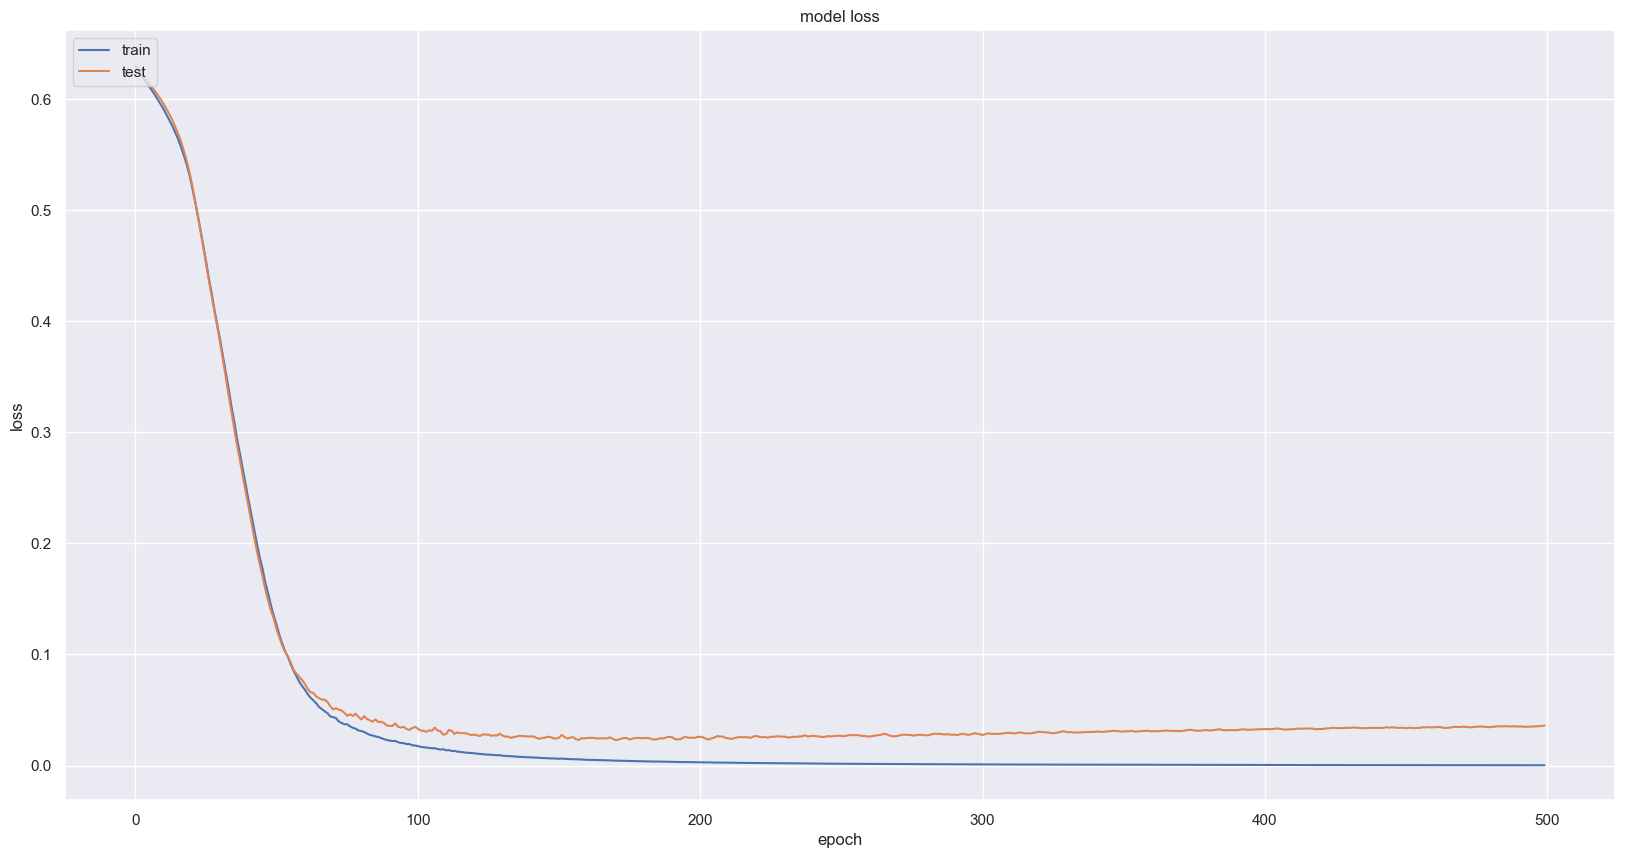

In [48]:
# historia wartości funkcji loss
fig = plt.figure(figsize=(20,10))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
print("\nRaport klasyfikacji na zbiorze testowym\n")
print(classification_report(y_test.argmax(axis=1), model_1.predict(x_test).argmax(axis=1)))


Raport klasyfikacji na zbiorze testowym

2/2 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        16

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### Zmiana paramatrów modelu

In [51]:
model_2 = create_model(15,20,25, 'relu')
results = model_2.fit(x_train, y_train, validation_split=0.33, batch_size=20, epochs=500, verbose=0)
print("\nRaport klasyfikacji na zbiorze testowym\n")
print(classification_report(y_test.argmax(axis=1), model_2.predict(x_test).argmax(axis=1)))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ukryta1 (Dense)             (None, 15)                210       
                                                                 
 ukryta2 (Dense)             (None, 20)                320       
                                                                 
 ukryta3 (Dense)             (None, 25)                525       
                                                                 
 wyjscie (Dense)             (None, 3)                 78        
                                                                 
 softmax_3 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 1,133
Trainable params: 1,133
Non-trainable params: 0
_________________________________________________________________
None

Raport klasyfikacji na zbiorze testowym

2/2 [

#### Uwagi:

- podejście do trenowania modelu bez standaryzaci zbioru testowego wykazywało bardzoniskie accuracy ma zbiorze testowym,
- wyjściowy model na teście wykazuje dość wysokie accuracy 
- wzrost ilości epok nie wpływał na poprawę wydajności modelu
- po dodaniu do modelu  opcji częstszej aktualiacji wag przez podziału zbioru danych na batche, accuracy modelu rosło
- stworzenie modelu w sposób sekwencyjny ze zmniejszeniem (jedynie ilości epok) również podnosiło dokładność modelu, jednak krzywe uczenia się na zbiorze testowym i treningowym wskazywały na nadmierne dopasowanie się modelu